In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [3]:
df= pd.read_csv("IRIS.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 6)

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
print(df['Species'])
df.head()

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [14]:
x = df.drop(['Species'], axis = 1).values
x

array([[1.00e+00, 5.10e+00, 3.50e+00, 1.40e+00, 2.00e-01],
       [2.00e+00, 4.90e+00, 3.00e+00, 1.40e+00, 2.00e-01],
       [3.00e+00, 4.70e+00, 3.20e+00, 1.30e+00, 2.00e-01],
       [4.00e+00, 4.60e+00, 3.10e+00, 1.50e+00, 2.00e-01],
       [5.00e+00, 5.00e+00, 3.60e+00, 1.40e+00, 2.00e-01],
       [6.00e+00, 5.40e+00, 3.90e+00, 1.70e+00, 4.00e-01],
       [7.00e+00, 4.60e+00, 3.40e+00, 1.40e+00, 3.00e-01],
       [8.00e+00, 5.00e+00, 3.40e+00, 1.50e+00, 2.00e-01],
       [9.00e+00, 4.40e+00, 2.90e+00, 1.40e+00, 2.00e-01],
       [1.00e+01, 4.90e+00, 3.10e+00, 1.50e+00, 1.00e-01],
       [1.10e+01, 5.40e+00, 3.70e+00, 1.50e+00, 2.00e-01],
       [1.20e+01, 4.80e+00, 3.40e+00, 1.60e+00, 2.00e-01],
       [1.30e+01, 4.80e+00, 3.00e+00, 1.40e+00, 1.00e-01],
       [1.40e+01, 4.30e+00, 3.00e+00, 1.10e+00, 1.00e-01],
       [1.50e+01, 5.80e+00, 4.00e+00, 1.20e+00, 2.00e-01],
       [1.60e+01, 5.70e+00, 4.40e+00, 1.50e+00, 4.00e-01],
       [1.70e+01, 5.40e+00, 3.90e+00, 1.30e+00, 4.00e-01

In [16]:
y = df['Species'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
Misclassification Rate: 0.0
R2 score 1.0


<Axes: >

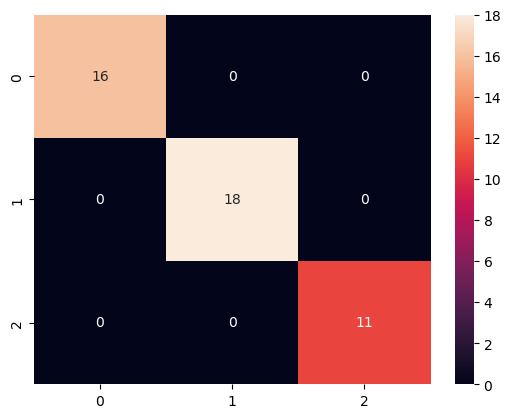

In [20]:
#iteration 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

misclassification_rate =1-accuracy
print("Misclassification Rate:", misclassification_rate)

print("R2 score",r2_score(y_test,y_pred))

import seaborn as sns
ax=plt.subplot()
cdf=pd.DataFrame(confusion_matrix_result)
sns.heatmap(cdf,annot=True)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Misclassification Rate: 0.0
R2 score 1.0


<Axes: >

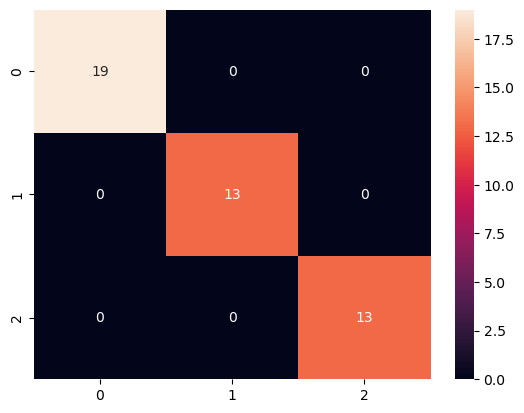

In [24]:
#iteration 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

misclassification_rate =1-accuracy
print("Misclassification Rate:", misclassification_rate)

print("R2 score",r2_score(y_test,y_pred))

import seaborn as sns
ax=plt.subplot()
cdf=pd.DataFrame(confusion_matrix_result)
sns.heatmap(cdf,annot=True)


[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2]
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        21

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Confusion Matrix:
 [[16  0  0]
 [ 0 23  0]
 [ 0  0 21]]
Misclassification Rate: 0.0
R2 score 1.0


<Axes: >

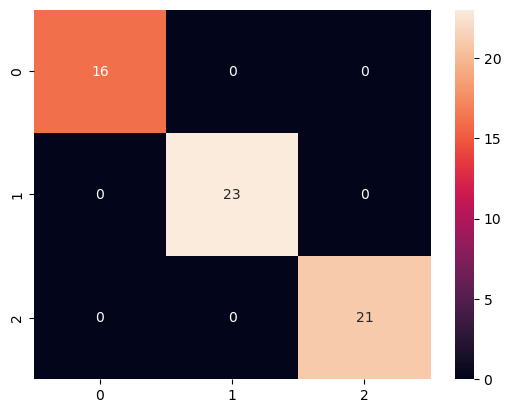

In [26]:
#iteration 2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

misclassification_rate =1-accuracy
print("Misclassification Rate:", misclassification_rate)

print("R2 score",r2_score(y_test,y_pred))

import seaborn as sns
ax=plt.subplot()
cdf=pd.DataFrame(confusion_matrix_result)
sns.heatmap(cdf,annot=True)


[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1]
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Confusion Matrix:
 [[23  0  0]
 [ 0 19  0]
 [ 0  0 18]]
Misclassification Rate: 0.0
R2 score 1.0


<Axes: >

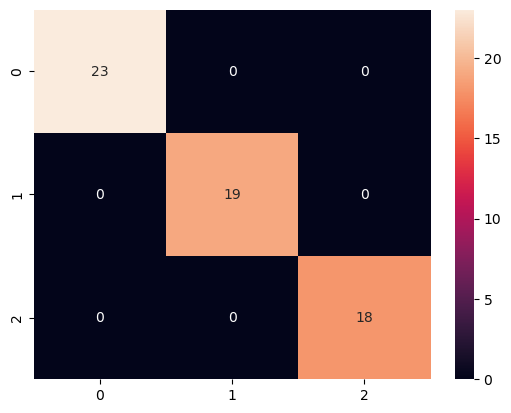

In [28]:
#iteration 2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

misclassification_rate =1-accuracy
print("Misclassification Rate:", misclassification_rate)

print("R2 score",r2_score(y_test,y_pred))

import seaborn as sns
ax=plt.subplot()
cdf=pd.DataFrame(confusion_matrix_result)
sns.heatmap(cdf,annot=True)

[2 1 0 2 0 2 0 1 1 1 2 0 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 0 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1]
Accuracy: 0.9733333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.93      0.97        30
           2       1.00      1.00      1.00        24

    accuracy                           0.97        75
   macro avg       0.97      0.98      0.97        75
weighted avg       0.98      0.97      0.97        75

Confusion Matrix:
 [[21  0  0]
 [ 2 28  0]
 [ 0  0 24]]
Misclassification Rate: 0.026666666666666616
R2 score 0.9554367201426025


<Axes: >

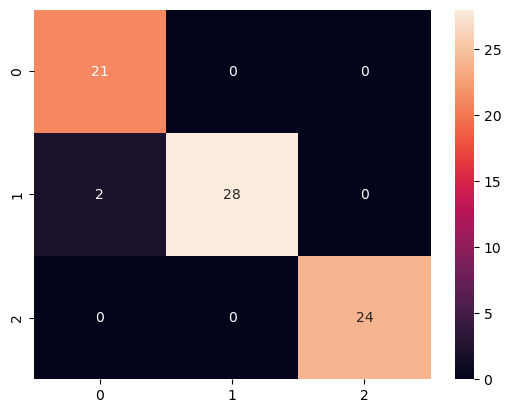

In [30]:
#iteration 3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

misclassification_rate =1-accuracy
print("Misclassification Rate:", misclassification_rate)

print("R2 score",r2_score(y_test,y_pred))

import seaborn as sns
ax=plt.subplot()
cdf=pd.DataFrame(confusion_matrix_result)
sns.heatmap(cdf,annot=True)


[0 0 1 1 1 1 1]
Accuracy: 0.42857142857142855
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      0.60      0.60         5

    accuracy                           0.43         7
   macro avg       0.30      0.30      0.30         7
weighted avg       0.43      0.43      0.43         7

Confusion Matrix:
 [[0 2]
 [2 3]]
Misclassification Rate: 0.5714285714285714
R2 score -1.7999999999999994


[Text(0, 0.5, 'Predicted(1)'), Text(0, 1.5, 'Predicted(0)')]

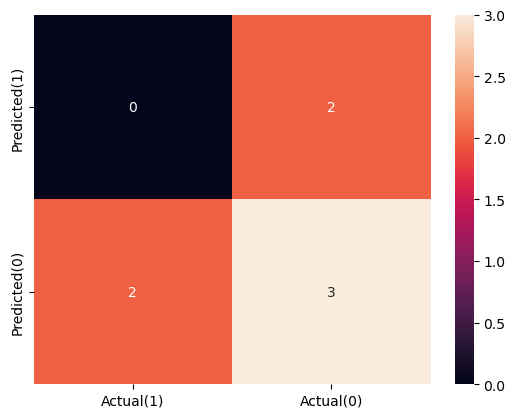

In [21]:
#iteration 3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

misclassification_rate =1-accuracy
print("Misclassification Rate:", misclassification_rate)

print("R2 score",r2_score(y_test,y_pred))

import seaborn as sns
ax=plt.subplot()
cdf=pd.DataFrame(confusion_matrix_result)
sns.heatmap(cdf,annot=True)
